In [ ]:

import pandas as pd
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 


In [ ]:

temperature_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project 2/GlobalLandTemperaturesByCountry.csv')


In [ ]:
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
len(temperature_df)

577462

In [ ]:
temperature_df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [ ]:
temperature_df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [ ]:
temperature_df.isnull().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [ ]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [ ]:
temperature_df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [ ]:
country_group_df = temperature_df.groupby(by = 'Country').count().reset_index('Country').rename(columns={'AverageTemperature':'AverageTemperatureCount','AverageTemperatureUncertainty' : 'AverageTemperatureUncertaintyCount'})

In [ ]:
country_group_df

,Country,dt,AverageTemperatureCount,AverageTemperatureUncertaintyCount
0,Afghanistan,2106,2085,2085
1,Africa,1965,1894,1894
2,Albania,3239,3166,3166
3,Algeria,2721,2702,2702
4,American Samoa,1761,1629,1629
...,...,...,...,...
238,Western Sahara,2721,2536,2536
239,Yemen,1653,1649,1649
240,Zambia,1965,1690,1690
241,Zimbabwe,1965,1725,1725


In [ ]:
country_group_df['Country']

0         Afghanistan
1              Africa
2             Albania
3             Algeria
4      American Samoa
            ...      
238    Western Sahara
239             Yemen
240            Zambia
241          Zimbabwe
242             Åland
Name: Country, Length: 243, dtype: object

In [ ]:
import plotly.express as px
fig = px.bar(country_group_df, x = 'Country', y = 'AverageTemperatureCount')
fig.show()

In [ ]:
fig = px.bar(country_group_df, x = 'Country', y = 'AverageTemperatureUncertaintyCount')
fig.show()

In [ ]:
fig = px.histogram(country_group_df, x = "AverageTemperatureCount")
fig.show()

In [ ]:
fig = px.histogram(country_group_df, x = "AverageTemperatureUncertaintyCount")
fig.show()

In [ ]:
country_group_df[(country_group_df['AverageTemperatureCount'] < 1500) | (country_group_df['AverageTemperatureUncertaintyCount'] < 1500)]

,Country,dt,AverageTemperatureCount,AverageTemperatureUncertaintyCount
8,Antarctica,764,0,739
73,Federated States Of Micronesia,1427,1364,1364
80,French Southern And Antarctic Lands,788,783,783
91,Guam,1329,1328,1328
98,Heard Island And Mcdonald Islands,788,783,783
161,Northern Mariana Islands,1329,1328,1328
204,South Georgia And The South Sandwich Isla,1666,1474,1474


In [ ]:
countries_with_less_data = country_group_df[(country_group_df['AverageTemperatureCount'] < 1500) | (country_group_df['AverageTemperatureUncertaintyCount'] < 1500)]['Country'].tolist()

In [ ]:
countries_with_less_data

['Antarctica',
 'Federated States Of Micronesia',
 'French Southern And Antarctic Lands',
 'Guam',
 'Heard Island And Mcdonald Islands',
 'Northern Mariana Islands',
 'South Georgia And The South Sandwich Isla']

In [ ]:
~temperature_df['Country'].isin(countries_with_less_data)

0         True
1         True
2         True
3         True
4         True
          ... 
577457    True
577458    True
577459    True
577460    True
577461    True
Name: Country, Length: 577462, dtype: bool

In [ ]:
temperature_df = temperature_df[~temperature_df['Country'].isin(countries_with_less_data)]

In [ ]:
temperature_df.reset_index(inplace = True, drop = True)

In [ ]:
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
...,...,...,...,...
569366,2013-05-01,19.059,1.022,Zimbabwe
569367,2013-06-01,17.613,0.473,Zimbabwe
569368,2013-07-01,17.000,0.453,Zimbabwe
569369,2013-08-01,19.759,0.717,Zimbabwe


In [ ]:
temperature_df['AverageTemperature'] = temperature_df['AverageTemperature'].fillna(temperature_df['AverageTemperature'].rolling(730, min_periods = 1).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
temperature_df['AverageTemperatureUncertainty']= temperature_df['AverageTemperatureUncertainty'].fillna(temperature_df['AverageTemperatureUncertainty'].rolling(730, min_periods=1).mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
temperature_df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [ ]:
temperature_df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt'

In [ ]:
duplicates = []
for i in temperature_df['Country'].unique():
    if '(' in i:
        duplicates.append(i)
duplicates

['Congo (Democratic Republic Of The)',
 'Denmark (Europe)',
 'Falkland Islands (Islas Malvinas)',
 'France (Europe)',
 'Netherlands (Europe)',
 'United Kingdom (Europe)']

In [ ]:
temperature_df = temperature_df.replace(duplicates, ['Congo', 'Denmark','Falkland Islands','France','Netherlands','United Kingdom'])

In [ ]:
temperature_df['Country'].unique()

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
     

In [ ]:
countries = temperature_df['Country'].unique().tolist()
countries

['Åland',
 'Afghanistan',
 'Africa',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua And Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Asia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Baker Island',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bonaire, Saint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 "Côte D'Ivoire",
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Europe',
 'Falkland Islands'

In [ ]:
mean_temperature = []
for i in countries:
    mean_temperature.append(temperature_df[temperature_df['Country'] == i]['AverageTemperature'].mean())

In [ ]:
data = [ dict(type = 'choropleth', 
              locations = countries, 
              z = mean_temperature, 
              locationmode = 'country names')
       ]

layout = dict(title = 'Average Global Land Temperatures',
              geo = dict(showframe = False,
                         showocean = True, 
                         oceancolor = 'aqua',
                         projection = dict(type = 'orthographic')))

fig = dict(data = data, layout = layout)
py.iplot(fig, validate = False, filename = 'worldmap')

In [ ]:
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384000,2.294000,Åland
1,1743-12-01,4.384000,2.294000,Åland
2,1744-01-01,4.384000,2.294000,Åland
3,1744-02-01,4.384000,2.294000,Åland
4,1744-03-01,4.384000,2.294000,Åland
...,...,...,...,...
569366,2013-05-01,19.059000,1.022000,Zimbabwe
569367,2013-06-01,17.613000,0.473000,Zimbabwe
569368,2013-07-01,17.000000,0.453000,Zimbabwe
569369,2013-08-01,19.759000,0.717000,Zimbabwe


In [ ]:
temperature_df['year'] = temperature_df['dt'].apply(lambda x: x.split('-')[0])
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384000,2.294000,Åland,1743
1,1743-12-01,4.384000,2.294000,Åland,1743
2,1744-01-01,4.384000,2.294000,Åland,1744
3,1744-02-01,4.384000,2.294000,Åland,1744
4,1744-03-01,4.384000,2.294000,Åland,1744
...,...,...,...,...,...
569366,2013-05-01,19.059000,1.022000,Zimbabwe,2013
569367,2013-06-01,17.613000,0.473000,Zimbabwe,2013
569368,2013-07-01,17.000000,0.453000,Zimbabwe,2013
569369,2013-08-01,19.759000,0.717000,Zimbabwe,2013


In [ ]:
fig = px.choropleth(temperature_df, locations = 'Country',
                    locationmode = 'country names', 
                    color = 'AverageTemperature', 
                    hover_name = "Country", 
                    animation_frame = 'year', 
                    color_continuous_scale = px.colors.sequential.deep_r)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df_global = temperature_df.groupby('year').mean().reset_index()

In [ ]:
df_global

,year,AverageTemperature,AverageTemperatureUncertainty
0,1743,11.371022,1.271705
1,1744,12.416144,1.545112
2,1745,12.034958,0.906291
3,1746,17.367274,0.379388
4,1747,17.375121,0.379358
...,...,...,...
266,2009,19.651797,0.338063
267,2010,19.732416,0.335082
268,2011,19.558313,0.352710
269,2012,19.569815,0.451734


In [ ]:
df_global['year'] = df_global['year'].apply(lambda x: int(x))
df_global = df_global[df_global['year'] > 1850]

In [ ]:
df_global

,year,AverageTemperature,AverageTemperatureUncertainty
108,1851,17.124712,1.496850
109,1852,16.564803,1.356184
110,1853,16.467485,1.198891
111,1854,16.492742,1.340729
112,1855,16.404508,1.308583
...,...,...,...
266,2009,19.651797,0.338063
267,2010,19.732416,0.335082
268,2011,19.558313,0.352710
269,2012,19.569815,0.451734


In [ ]:
trace1 = go.Scatter(
    x = df_global['year'], 
    y = np.array(df_global['AverageTemperature']) + np.array(df_global['AverageTemperatureUncertainty']), 
    name = 'Uncertainty top',
    line = dict(color = 'green'))

trace2 = go.Scatter(
    x = df_global['year'] , 
    y = np.array(df_global['AverageTemperature']) - np.array(df_global['AverageTemperatureUncertainty']), 
    fill = 'tonexty',
    name = 'Uncertainty bottom',
    line = dict(color = 'green'))

trace3 = go.Scatter(
    x = df_global['year'] , 
    y = df_global['AverageTemperature'],
    name = 'Average Temperature',
    line = dict(color='red'))
data = [trace1, trace2, trace3]

layout = go.Layout(
    xaxis = dict(title = 'year'),
    yaxis = dict(title = 'Average Temperature, °C'),
    title = 'Average Land Temperatures Globally',
    showlegend = False)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [ ]:
#INDIA

In [ ]:
IND_df = temperature_df[temperature_df['Country'] == 'India'].reset_index(drop = True)
IND_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
0,1796-01-01,17.04400,2.044000,India,1796,1
1,1796-02-01,19.19300,1.359000,India,1796,2
2,1796-03-01,22.31900,2.125000,India,1796,3
3,1796-04-01,27.23300,1.510000,India,1796,4
4,1796-05-01,30.03500,1.338000,India,1796,5
...,...,...,...,...,...,...
2608,2013-05-01,31.01400,0.205000,India,2013,5
2609,2013-06-01,28.76600,0.299000,India,2013,6
2610,2013-07-01,27.01200,0.197000,India,2013,7
2611,2013-08-01,26.55500,0.242000,India,2013,8


In [ ]:
IND_df[IND_df['year']=='1863']

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
804,1863-01-01,23.412863,1.690212,India,1863,1
805,1863-02-01,23.406130,1.690063,India,1863,2
806,1863-03-01,23.397243,1.689851,India,1863,3
807,1863-04-01,23.386508,1.690143,India,1863,4
808,1863-05-01,23.379688,1.690409,India,1863,5
809,1863-06-01,23.374763,1.690802,India,1863,6
810,1863-07-01,23.369641,1.690689,India,1863,7
811,1863-08-01,23.367798,1.688846,India,1863,8
812,1863-09-01,23.372604,1.688884,India,1863,9
813,1863-10-01,23.382786,1.688879,India,1863,10


In [ ]:
fig = px.line(title = 'INDIA Temperature Data')
IND_df_updated = IND_df[IND_df['year'] > '1813']
fig.add_scatter(x = IND_df_updated['dt'], y = IND_df_updated['AverageTemperature'], name = 'IND Temperature')
fig.show()

In [ ]:
wrong_data = IND_df[(IND_df['year'] == '1963') | (IND_df['year']== '1964')]

In [ ]:
wrong_data

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
2004,1963-01-01,16.554,0.250,India,1963,1
2005,1963-02-01,20.342,0.240,India,1963,2
2006,1963-03-01,23.609,0.346,India,1963,3
2007,1963-04-01,26.827,0.402,India,1963,4
2008,1963-05-01,29.309,0.422,India,1963,5
2009,1963-06-01,28.943,0.321,India,1963,6
2010,1963-07-01,27.324,0.343,India,1963,7
2011,1963-08-01,26.209,0.107,India,1963,8
2012,1963-09-01,26.146,0.281,India,1963,9
2013,1963-10-01,24.631,0.160,India,1963,10


In [ ]:
fig = px.line(title = 'INDIA Temperature Data')
IND_df_updated = IND_df_updated[(IND_df_updated['year'] != '1963') ]
fig.add_scatter(x = IND_df_updated['dt'], y = IND_df_updated['AverageTemperature'], name = 'IND Temperature')
fig.show()

In [ ]:
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
0,1743-11-01,4.384000,2.294000,Åland,1743,11
1,1743-12-01,4.384000,2.294000,Åland,1743,12
2,1744-01-01,4.384000,2.294000,Åland,1744,1
3,1744-02-01,4.384000,2.294000,Åland,1744,2
4,1744-03-01,4.384000,2.294000,Åland,1744,3
...,...,...,...,...,...,...
569366,2013-05-01,19.059000,1.022000,Zimbabwe,2013,5
569367,2013-06-01,17.613000,0.473000,Zimbabwe,2013,6
569368,2013-07-01,17.000000,0.453000,Zimbabwe,2013,7
569369,2013-08-01,19.759000,0.717000,Zimbabwe,2013,8


In [ ]:
temperature_df['Month'] = temperature_df['dt'].apply(lambda x: int(x.split('-')[1]))

In [ ]:
temperature_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year
0,1743-11-01,4.384000,2.294000,Åland,1743
1,1743-12-01,4.384000,2.294000,Åland,1743
2,1744-01-01,4.384000,2.294000,Åland,1744
3,1744-02-01,4.384000,2.294000,Åland,1744
4,1744-03-01,4.384000,2.294000,Åland,1744
...,...,...,...,...,...
569366,2013-05-01,19.059000,1.022000,Zimbabwe,2013
569367,2013-06-01,17.613000,0.473000,Zimbabwe,2013
569368,2013-07-01,17.000000,0.453000,Zimbabwe,2013
569369,2013-08-01,19.759000,0.717000,Zimbabwe,2013


In [ ]:
df_global_monthly = temperature_df.groupby(['dt']).mean().reset_index()

In [ ]:
df_global_monthly

,dt,AverageTemperature,AverageTemperatureUncertainty,Month
0,1743-11-01,5.184140,2.183520,11
1,1743-12-01,17.557905,0.359890,12
2,1744-01-01,17.565159,0.359919,1
3,1744-02-01,17.568875,0.359907,2
4,1744-03-01,17.569168,0.359897,3
...,...,...,...,...
3234,2013-05-01,21.628038,0.471356,5
3235,2013-06-01,22.938568,0.510081,6
3236,2013-07-01,23.695627,0.508631,7
3237,2013-08-01,23.525953,0.587106,8


In [ ]:
def prepare_data(df, feature_range):
    
    columns = df.columns
    
    for i in range(1, (feature_range + 1)):
        for j in columns[1:]:
            name = j + '_t-' + str(i)
            df[name] = df[j].shift((i))
    
    df['Target'] = df['AverageTemperature'].shift(-1)
    return df

In [ ]:
df_global_monthly = prepare_data(df_global_monthly, 3)

In [ ]:
df_global_monthly

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,AverageTemperature_t-1,AverageTemperatureUncertainty_t-1,Month_t-1,AverageTemperature_t-2,AverageTemperatureUncertainty_t-2,Month_t-2,AverageTemperature_t-3,AverageTemperatureUncertainty_t-3,Month_t-3,Target
0,1743-11-01,5.184140,2.183520,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.557905
1,1743-12-01,17.557905,0.359890,12,5.184140,2.183520,11.0,NaN,NaN,NaN,NaN,NaN,NaN,17.565159
2,1744-01-01,17.565159,0.359919,1,17.557905,0.359890,12.0,5.184140,2.183520,11.0,NaN,NaN,NaN,17.568875
3,1744-02-01,17.568875,0.359907,2,17.565159,0.359919,1.0,17.557905,0.359890,12.0,5.184140,2.183520,11.0,17.569168
4,1744-03-01,17.569168,0.359897,3,17.568875,0.359907,2.0,17.565159,0.359919,1.0,17.557905,0.359890,12.0,8.661480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3234,2013-05-01,21.628038,0.471356,5,19.464860,0.551025,4.0,17.252064,0.576445,3.0,15.885475,0.561750,2.0,22.938568
3235,2013-06-01,22.938568,0.510081,6,21.628038,0.471356,5.0,19.464860,0.551025,4.0,17.252064,0.576445,3.0,23.695627
3236,2013-07-01,23.695627,0.508631,7,22.938568,0.510081,6.0,21.628038,0.471356,5.0,19.464860,0.551025,4.0,23.525953
3237,2013-08-01,23.525953,0.587106,8,23.695627,0.508631,7.0,22.938568,0.510081,6.0,21.628038,0.471356,5.0,19.426306


In [ ]:
df_global_monthly = df_global_monthly.dropna().reset_index(drop = True)

In [ ]:
df_global_monthly

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,AverageTemperature_t-1,AverageTemperatureUncertainty_t-1,Month_t-1,AverageTemperature_t-2,AverageTemperatureUncertainty_t-2,Month_t-2,AverageTemperature_t-3,AverageTemperatureUncertainty_t-3,Month_t-3,Target
0,1744-02-01,17.568875,0.359907,2,17.565159,0.359919,1.0,17.557905,0.359890,12.0,5.184140,2.183520,11.0,17.569168
1,1744-03-01,17.569168,0.359897,3,17.568875,0.359907,2.0,17.565159,0.359919,1.0,17.557905,0.359890,12.0,8.661480
2,1744-04-01,8.661480,2.801440,4,17.569168,0.359897,3.0,17.568875,0.359907,2.0,17.565159,0.359919,1.0,11.098360
3,1744-05-01,11.098360,1.994440,5,8.661480,2.801440,4.0,17.569168,0.359897,3.0,17.568875,0.359907,2.0,14.927720
4,1744-06-01,14.927720,2.020060,6,11.098360,1.994440,5.0,8.661480,2.801440,4.0,17.569168,0.359897,3.0,17.094300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,2013-04-01,19.464860,0.551025,4,17.252064,0.576445,3.0,15.885475,0.561750,2.0,15.005826,0.519525,1.0,21.628038
3231,2013-05-01,21.628038,0.471356,5,19.464860,0.551025,4.0,17.252064,0.576445,3.0,15.885475,0.561750,2.0,22.938568
3232,2013-06-01,22.938568,0.510081,6,21.628038,0.471356,5.0,19.464860,0.551025,4.0,17.252064,0.576445,3.0,23.695627
3233,2013-07-01,23.695627,0.508631,7,22.938568,0.510081,6.0,21.628038,0.471356,5.0,19.464860,0.551025,4.0,23.525953


In [ ]:
train = df_global_monthly[:int(0.9 * len(df_global_monthly))].drop(columns = 'dt').values

In [ ]:
test = df_global_monthly[int(0.9 * len(df_global_monthly)):].drop(columns = 'dt').values

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
train  = scaler.fit_transform(train)
test   = scaler.transform(test)

In [ ]:
train_x, train_y = train[:,:-1], train[:,-1]
test_x, test_y = test[:,:-1], test[:,-1]

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(2911, 1, 12) (2911,) (324, 1, 12) (324,)


In [ ]:
def create_model(train_x):
  
    inputs = keras.layers.Input(shape = (train_x.shape[1], train_x.shape[2]))
    x = keras.layers.LSTM(50,return_sequences =  True)(inputs)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(50, return_sequences = True)(x)
    x = keras.layers.Dropout(0.3)(x)
    x = keras.layers.LSTM(50)(x)
    outputs = keras.layers.Dense(1, activation = 'linear')(x)

    model = keras.Model(inputs = inputs, outputs = outputs)
    model.compile(optimizer = 'adam', loss = "mse")
    return model

In [ ]:
model = create_model(train_x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 12)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 50)             12600     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51    

In [ ]:
history = model.fit(train_x, train_y, epochs = 50, batch_size = 72, validation_data = (test_x, test_y), shuffle = False)


Epoch 1/50
41/41 [==============================] - 12s 40ms/step - loss: 0.3127 - val_loss: 0.0379
Epoch 2/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0808 - val_loss: 0.0252
Epoch 3/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0547 - val_loss: 0.0183
Epoch 4/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0430 - val_loss: 0.0116
Epoch 5/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0322 - val_loss: 0.0051
Epoch 6/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0017
Epoch 7/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0146 - val_loss: 0.0015
Epoch 8/50
41/41 [==============================] - 0s 10ms/step - loss: 0.0119 - val_loss: 0.0015
Epoch 9/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0107 - val_loss: 0.0016
Epoch 10/50
41/41 [==============================] - 0s 9ms/step - loss: 0.0106 - val_loss: 0.0014
Epoch 11/50


In [ ]:
def plot_history(history):
    
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.grid()
    plt.legend()
    plt.show()

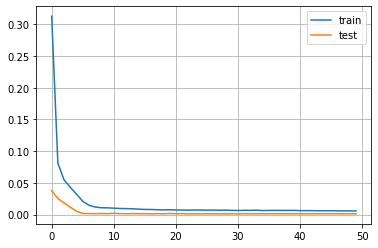

In [ ]:
plot_history(history)

In [ ]:
def prediction(model,test_x,train_x, df):
    
    predict =  model.predict(test_x)

    
    test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
    train_x = train_x.reshape((train_x.shape[0], train_x.shape[2]))

    
    predict_ = np.concatenate((test_x, predict),axis = 1)

    
    predict_ = scaler.inverse_transform(predict_)
    original_ = scaler.inverse_transform(test)

    
    pred = pd.DataFrame()
    pred['dt'] = df['dt'][-test_x.shape[0]:]
    pred['Original'] = original_[:,-1]
    pred['Predicted'] = predict_[:,-1]

     
    pred['Error'] = pred['Original'] - pred['Predicted']
    
    
    df = df[['dt','AverageTemperature']][:-test_x.shape[0]]
    df.columns = ['dt','Original']
    original = df.append(pred[['dt','Original']])
    df.columns = ['dt','Predicted']
    predicted = df.append(pred[['dt','Predicted']])
    original = original.merge(predicted, left_on = 'dt',right_on = 'dt')
    return pred, original

In [ ]:
pred, original = prediction(model, test_x, train_x, df_global_monthly )

In [ ]:
def plot_error(df):

    
    fig = px.line(title = 'Prediction vs. Actual')
    fig.add_scatter(x = df['dt'], y = df['Original'], name = 'Original', opacity = 0.7)
    fig.add_scatter(x = df['dt'], y = df['Predicted'], name = 'Predicted', opacity = 0.5)
    fig.show()

    fig = px.line(title = 'Error')
    fig = fig.add_scatter(x = df['dt'], y = df['Error'])
    fig.show()



In [ ]:
def plot(df):
    
    fig = px.line(title = 'Prediction vs. Actual')
    fig.add_scatter(x = df['dt'], y = df['Original'], name = 'Original', opacity = 0.7)
    fig.add_scatter(x = df['dt'], y = df['Predicted'], name = 'Predicted', opacity = 0.5)
    fig.show()


In [ ]:
plot(original)

In [ ]:
plot_error(pred)


In [ ]:
IND_df = temperature_df[temperature_df['Country'] == 'India'].reset_index(drop = True)
IND_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,Month
0,1796-01-01,17.04400,2.044000,India,1796,1
1,1796-02-01,19.19300,1.359000,India,1796,2
2,1796-03-01,22.31900,2.125000,India,1796,3
3,1796-04-01,27.23300,1.510000,India,1796,4
4,1796-05-01,30.03500,1.338000,India,1796,5
...,...,...,...,...,...,...
2608,2013-05-01,31.01400,0.205000,India,2013,5
2609,2013-06-01,28.76600,0.299000,India,2013,6
2610,2013-07-01,27.01200,0.197000,India,2013,7
2611,2013-08-01,26.55500,0.242000,India,2013,8


In [ ]:
IND_df = IND_df.drop(['Country', 'year'], axis = 1)

In [ ]:
IND_df = prepare_data(IND_df, 3)

In [ ]:
IND_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Month,AverageTemperature_t-1,AverageTemperatureUncertainty_t-1,Month_t-1,AverageTemperature_t-2,AverageTemperatureUncertainty_t-2,Month_t-2,AverageTemperature_t-3,AverageTemperatureUncertainty_t-3,Month_t-3,Target
0,1796-01-01,17.04400,2.044000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.19300
1,1796-02-01,19.19300,1.359000,2,17.044,2.044,1.0,NaN,NaN,NaN,NaN,NaN,NaN,22.31900
2,1796-03-01,22.31900,2.125000,3,19.193,1.359,2.0,17.044,2.044,1.0,NaN,NaN,NaN,27.23300
3,1796-04-01,27.23300,1.510000,4,22.319,2.125,3.0,19.193,1.359,2.0,17.044,2.044,1.0,30.03500
4,1796-05-01,30.03500,1.338000,5,27.233,1.510,4.0,22.319,2.125,3.0,19.193,1.359,2.0,29.26100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,2013-05-01,31.01400,0.205000,5,27.981,0.299,4.0,24.575,0.379,3.0,20.243,0.448,2.0,28.76600
2609,2013-06-01,28.76600,0.299000,6,31.014,0.205,5.0,27.981,0.299,4.0,24.575,0.379,3.0,27.01200
2610,2013-07-01,27.01200,0.197000,7,28.766,0.299,6.0,31.014,0.205,5.0,27.981,0.299,4.0,26.55500
2611,2013-08-01,26.55500,0.242000,8,27.012,0.197,7.0,28.766,0.299,6.0,31.014,0.205,5.0,24.34021


In [ ]:
IND_df = IND_df.dropna().reset_index(drop = True)

In [ ]:
train = IND_df[:int(0.9 * len(IND_df))].drop(columns = 'dt').values

In [ ]:
test = IND_df[int(0.9 * len(IND_df)):].drop(columns = 'dt').values

In [ ]:
train.shape

(2348, 13)

In [ ]:
scaler = MinMaxScaler(feature_range = (0, 1))
train  = scaler.fit_transform(train)
test   = scaler.transform(test)

# train  = scaler.fit_transform(train[:, 0:2])
# test   = scaler.transform(test[:,0:2])

In [ ]:
train_x, train_y = train[:,:-1], train[:,-1]
test_x, test_y = test[:,:-1], test[:,-1]

In [ ]:
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(2348, 1, 12) (2348,) (261, 1, 12) (261,)


In [ ]:
train_x

array([[[0.85934636, 0.23962139, 0.27272727, ..., 0.50946356,
         0.32829625, 0.        ]],

       [[0.95556499, 0.21105945, 0.36363636, ..., 0.58325864,
         0.21454666, 0.09090909]],

       [[0.92898639, 0.47924278, 0.45454545, ..., 0.6906032 ,
         0.34174693, 0.18181818]],

       ...,

       [[0.83445039, 0.01992693, 0.72727273, ..., 0.92119138,
         0.02225174, 0.45454545]],

       [[0.76141077, 0.02075722, 0.81818182, ..., 0.87098737,
         0.03437396, 0.54545455]],

       [[0.63253549, 0.01992693, 0.90909091, ..., 0.82696443,
         0.0267353 , 0.63636364]]])

In [ ]:
model = create_model(train_x)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 12)]           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 50)             12600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51  

In [ ]:
history = model.fit(train_x, train_y, epochs = 50, batch_size = 72, validation_data = (test_x, test_y), shuffle = False)


Epoch 1/50
33/33 [==============================] - 8s 47ms/step - loss: 0.3929 - val_loss: 0.1400
Epoch 2/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0567 - val_loss: 0.0353
Epoch 3/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0403 - val_loss: 0.0225
Epoch 4/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0310 - val_loss: 0.0127
Epoch 5/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0217 - val_loss: 0.0063
Epoch 6/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0162 - val_loss: 0.0034
Epoch 7/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0134 - val_loss: 0.0026
Epoch 8/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0127 - val_loss: 0.0021
Epoch 9/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0120 - val_loss: 0.0017
Epoch 10/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0122 - val_loss: 0.0022
Epoch 11/50
33/

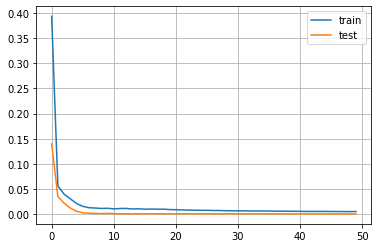

In [ ]:
plot_history(history)

In [ ]:
pred, original = prediction(model, test_x, train_x, IND_df )

In [ ]:
plot(original)

In [ ]:
plot_error(pred)